In [1]:
import pandas as pd
from scipy import stats
from IPython.display import display
import datetime
%pylab inline
ph_path = '..\\data\\flickr_photo_in_museum.csv' # produced from flickr_photo_in_museum.py
ph_df = pd.read_csv(ph_path,index_col=0)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import p

In [2]:
ph_df.columns, ph_df.shape

(Index([u'farm', u'id', u'isfamily', u'isfriend', u'ispublic', u'museum',
        u'owner', u'secret', u'server', u'title', u'pid', u'dateuploaded',
        u'username', u'realname', u'path_alias', u'owner_loc', u'comments',
        u'views', u'lat', u'lon', u'loc_accuracy', u'loc_placeid',
        u'date_taken', u'date_posted', u'date_lastupdate',
        u'date_takengranularity', u'date_takenunknown'],
       dtype='object'), (68820, 27))

In [5]:
ph_df[ph_df.museum=='BRITISH MUSEUM'].shape

(13490, 27)

In [6]:
pd.unique(ph_df.museum).shape, pd.unique(ph_df.museum.apply(lambda x: x[:-1] if x[-1].isdigit() else x)).shape

((40L,), (29L,))

In [7]:
ph_df.museum = ph_df.museum.apply(lambda x: x[:-1].replace(' ','_') if x[-1].isdigit() else x.replace(' ','_'))

In [8]:
pd.unique(ph_df.museum)

array(['(NHM)_SOUTH_KENSINGTON', 'SCIENCE_SOUTH_KENSINGTON', '(NHM)_TRING',
       '(RA)_FORT_NELSON', '(RA)_LEEDS', '(RA)_WHITE_TOWER',
       '(V&A)_BLYTHE_HOUSE', '(V&A)_CHILDHOOD', '(V&A)_SOUTH_KENSINGTON',
       'BRITISH_MUSEUM', 'CHURCHILL_WAR_ROOMS_(IWM)', 'GEFFRYE_MUSEUM',
       'HMS_BELFAST_(IWM)', 'HORNIMAN_MUSEUM', 'IWM_DUXFORD', 'IWM_NORTH',
       'NATIONAL_COAL_MINING_MUSEUM', 'NATIONAL_GALLERY',
       'NATIONAL_PORTRAIT_GALLERY', 'ROYAL_MUSEUMS_GREENWICH',
       'SCIENCE_AND_INDUSTRY_MANCHESTER', 'SCIENCE_LOCOMOTION_SHILDON',
       'SCIENCE_NATIONAL_MEDIA_MUSEUM', 'SIR_JOHN_SOANES', 'TATE_BRITAIN',
       'TATE_LIVERPOOL', 'TATE_MODERN', 'TATE_ST_IVES',
       'WALLACE_COLLECTION'], dtype=object)

In [9]:
def get_yr_mn_dy(x):
    dt = datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
    return '%s_%02d_%02d' %(dt.year, int(dt.month),int(dt.day))
def get_yr_mn(x):
    dt = datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
    return '%s_%02d' %(dt.year, int(dt.month))
name_pair={'BRITISH_MUSEUM':'The_British_Museum', 'GEFFRYE_MUSEUM':'Geffrye_Museum', 'HORNIMAN_MUSEUM':'Horniman_Museum_and_Gardens', 'IWM_LONDON':'Imperial_War_Museum', 'HMS_BELFAST_(IWM)':'HMS_Belfast', 'CHURCHILL_WAR_ROOMS_(IWM)':'Imperial_War_Museums,_Churchill_War_Rooms', 'IWM_DUXFORD ':'Imperial_War_Museum,_Duxford,_Cambridge,_UK', 'IWM_NORTH':'IWM_North', 'NATIONAL_GALLERY':'The_National_Gallery', '(NHM)_SOUTH_KENSINGTON':'Natural_History_Museum', '(NHM)_TRING':'Natural_History_Museum_at_Tring', 'ROYAL_MUSEUMS_GREENWICH ':'Royal_Museums_Greenwich', 'NATIONAL_COAL_MINING_MUSEUM':'National_Coal_Mining_Museum_for_England'}
months = ['2014_01','2014_02','2014_03','2014_04','2014_05','2014_06','2014_07','2014_08','2014_09','2014_10','2014_11','2014_12','2015_01','2015_02','2015_03','2015_04','2015_05','2015_06','2015_07','2015_08','2015_09','2015_10','2015_11','2015_12','2016_01','2016_02','2016_03','2016_04','2016_05','2016_06','2016_07','2016_08','2016_09']

In [10]:
ph_cnt_each_mu = {}
for mu, g in ph_df[['museum','owner','username','date_taken']].groupby('museum'):
    m_df = g.copy()
    m_df['ymd'] = m_df.date_taken.apply(lambda x: get_yr_mn_dy(x))
    m_df['ym'] = m_df.date_taken.apply(lambda x: get_yr_mn(x))
#     display(m_df)
    m_df.drop_duplicates(['ymd','owner'],inplace=True)
    x = m_df.groupby('ym').count()['date_taken']
    x = x.reindex(months).fillna(0)
#     print x
    ph_cnt_each_mu[mu]=list(x.values)
#     break


In [11]:
museum_statistic_clean = '..\\data\\'
target_df = pd.read_csv(museum_statistic_clean ,index_col=0)
target_cnt = {}
for mu, gb in target_df.groupby('mu'):
    target_cnt[mu.strip()] = gb[gb.ym.isin(months)].cnt.apply(lambda x: float(x.replace(',','')) if type(x)==str else x).tolist()


IOError: File Meseum visit/cleaned_UK_museum.csv does not exist

(RA)_LEEDS
[1.0, 1.0, 4.0, 5.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 3.0, 0.0, 5.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 1.0, 3.0, 0.0, 3.0, 0.0, 3.0, 1.0, 0.0]
[13948.0, 21219.0, 19737.0, 21780.0, 14705.0, 24450.0, 19263.0, 44437.0, 13368.0, 13783.0, 21039.0, 9907.0, 12591.0, 19540.0, 18183.0, 18828.0, 14490.0, 22783.0, 18582.0, 25143.0, 25734.0, 12251.0, 18070.0, 12340.0, 12010.0, 19338.0, 24649.0, 20038.0, 14075.0, 22130.0, 18453.0]
31 31
r square =  0.0141269868249 p value: 0.52423126952

WALLACE_COLLECTION
[0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 3.0, 2.0, 1.0, 1.0, 0.0, 2.0, 3.0, 2.0, 1.0, 2.0, 4.0, 3.0, 6.0, 6.0, 1.0, 5.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 1.0, 2.0, 1.0]
[36497.0, 32354.0, 33795.0, 29206.0, 32092.0, 32309.0, 32971.0, 30609.0, 36332.0, 41832.0, 39109.0, 33396.0, 37144.0, 39064.0, 43772.0, 38096.0, 40402.0, 37346.0, 33061.0, 35048.0, 32868.0, 36814.0, 36078.0, 30739.0, 34078.0, 36401.0, 36392.0, 32490.0, 35652.0, 33087.0, 34914.0]
31 31
r square =  0.0173479185088 p value

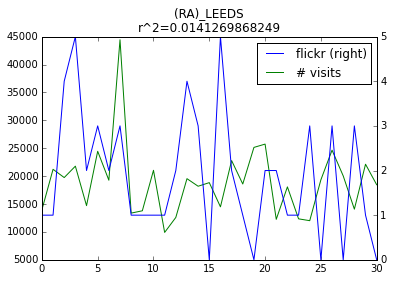

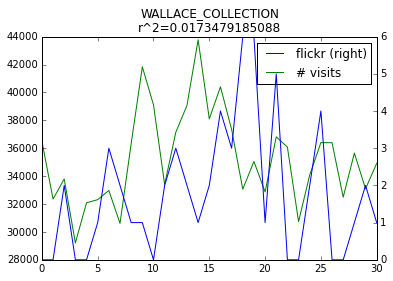

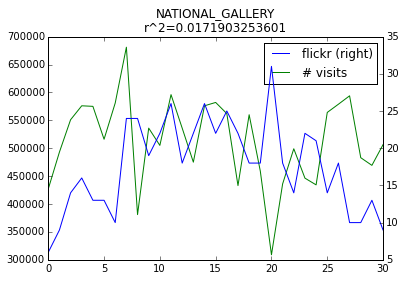

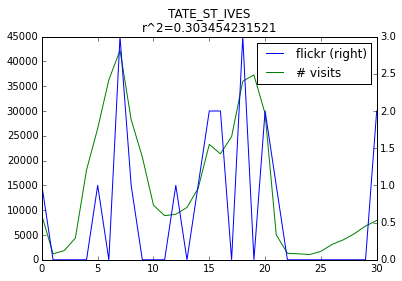

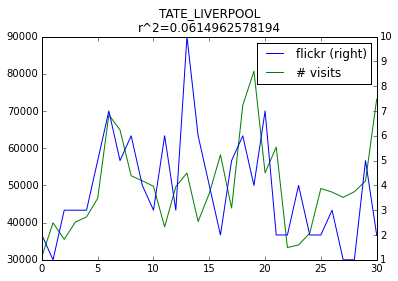

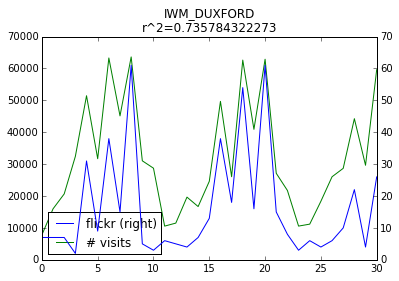

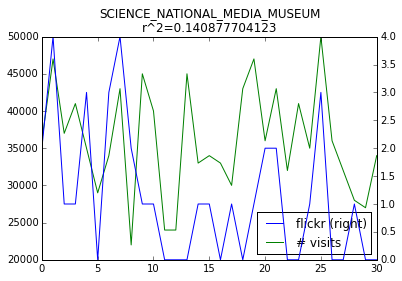

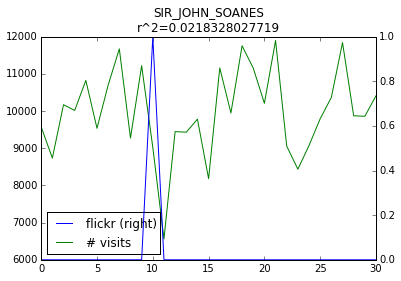

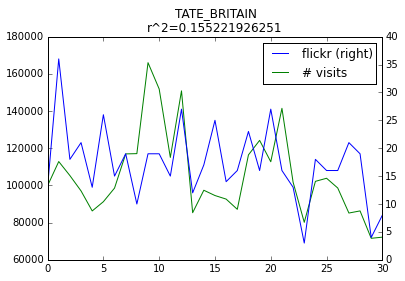

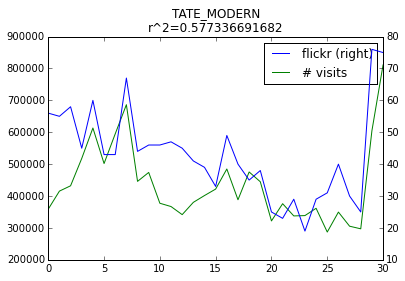

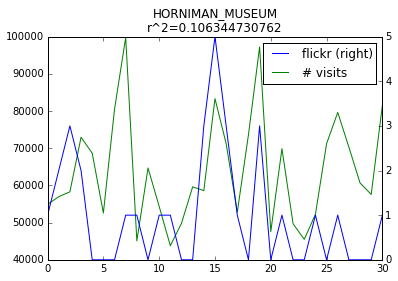

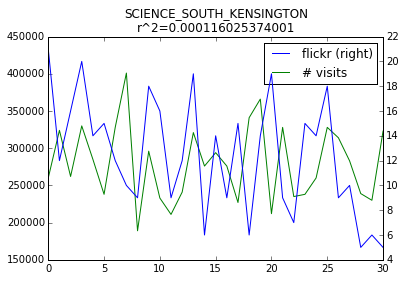

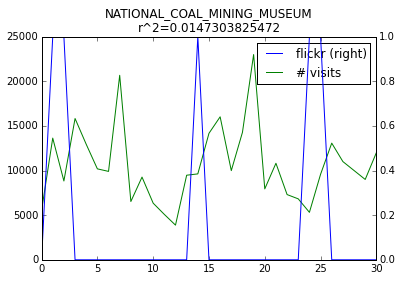

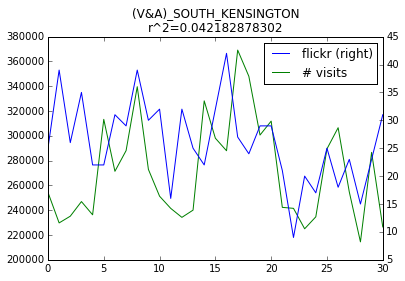

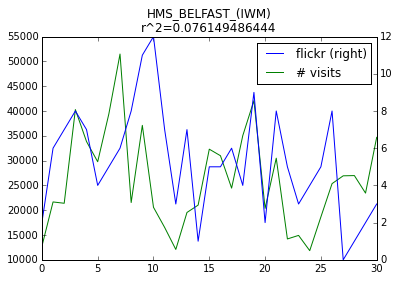

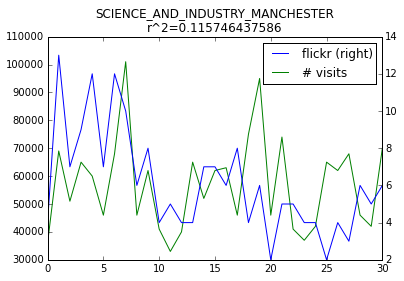

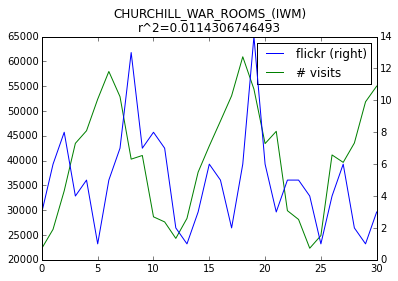

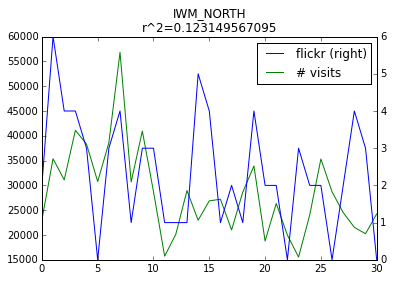

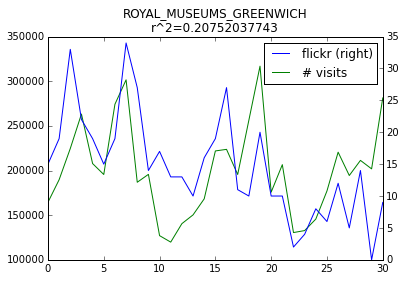

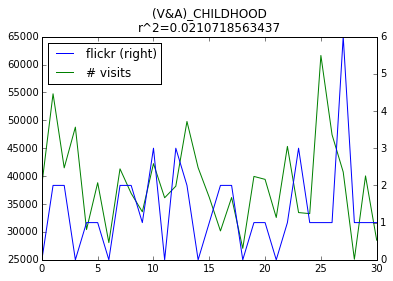

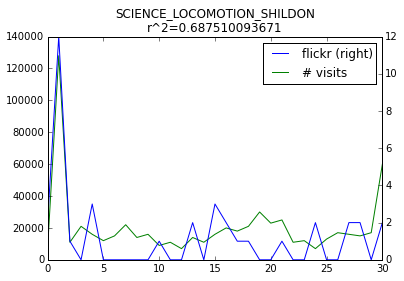

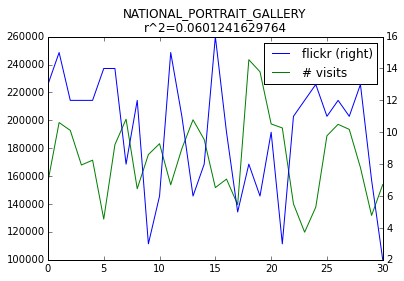

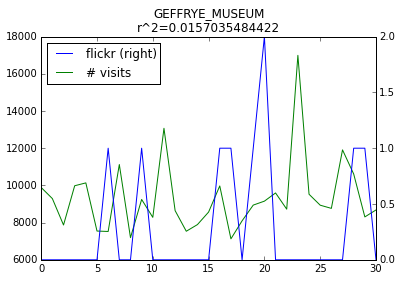

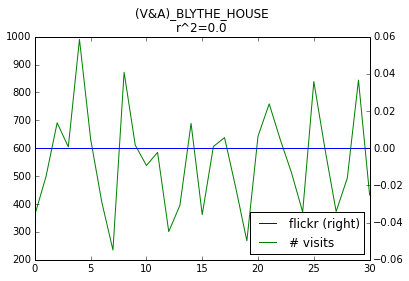

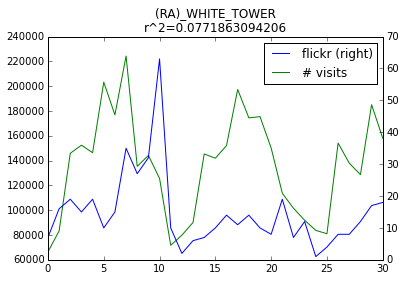

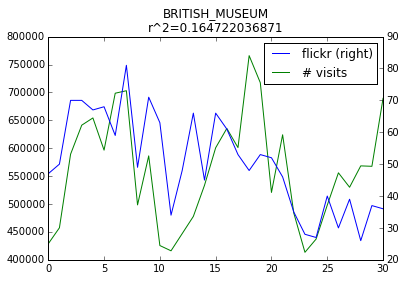

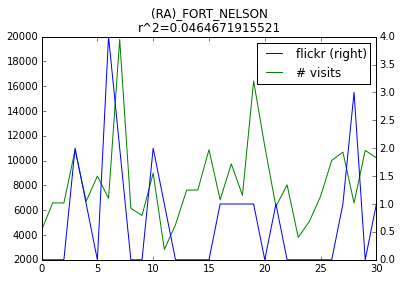

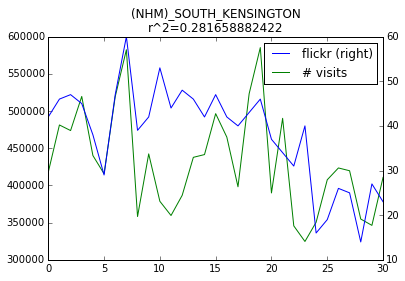

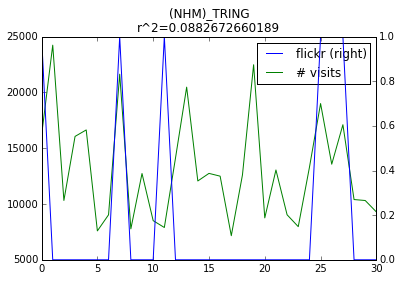

In [26]:
super_x = []
super_y = []
super_m = []
r = []
p = []
for m in ph_cnt_each_mu.keys():
    x = ph_cnt_each_mu[m][:-2]
    y = target_cnt[m][:-2]
    print m
    print x
    print y
    print len(x), len(y)
    super_x.extend(x)
    super_y.extend(y)
    super_m.extend([m]*len(x))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print  'r square = ', r_value**2, 'p value:', p_value
    r.append(r_value**2)
    p.append(p_value)
    pd.DataFrame(zip(x,y),columns=['flickr','# visits']).plot(secondary_y='flickr',title=m+'\nr^2='+str(r_value**2))
    print 


,museum,r_square,p_value,significant
27,(NHM)_SOUTH_KENSINGTON,0.281659,0.00213,True
28,(NHM)_TRING,0.088267,0.10457,False
26,(RA)_FORT_NELSON,0.046467,0.24417,False
0,(RA)_LEEDS,0.014127,0.52423,False
24,(RA)_WHITE_TOWER,0.077186,0.13021,False
23,(V&A)_BLYTHE_HOUSE,0.000000,1.00000,False
19,(V&A)_CHILDHOOD,0.021072,0.43589,False
13,(V&A)_SOUTH_KENSINGTON,0.042183,0.26769,False
25,BRITISH_MUSEUM,0.164722,0.02349,True
16,CHURCHILL_WAR_ROOMS_(IWM),0.011431,0.56701,False


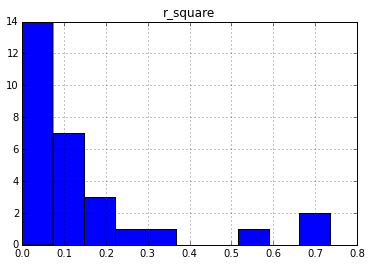

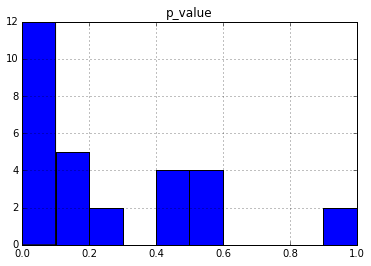

In [27]:
pd.DataFrame(r, columns=['r_square']).hist()
pd.DataFrame(p, columns=['p_value']).hist()
df_bbbb = pd.DataFrame(zip(ph_cnt_each_mu.keys(),r,p,np.array(p)<0.05),columns=['museum','r_square','p_value','significant'])
df_bbbb['p_value'] = df_bbbb.p_value.apply(lambda x: '%.05f' % x)
df_bbbb.sort('museum')

0.669362725811 9198.56099336 31756.678976 8.74261557747e-218 215.85833088


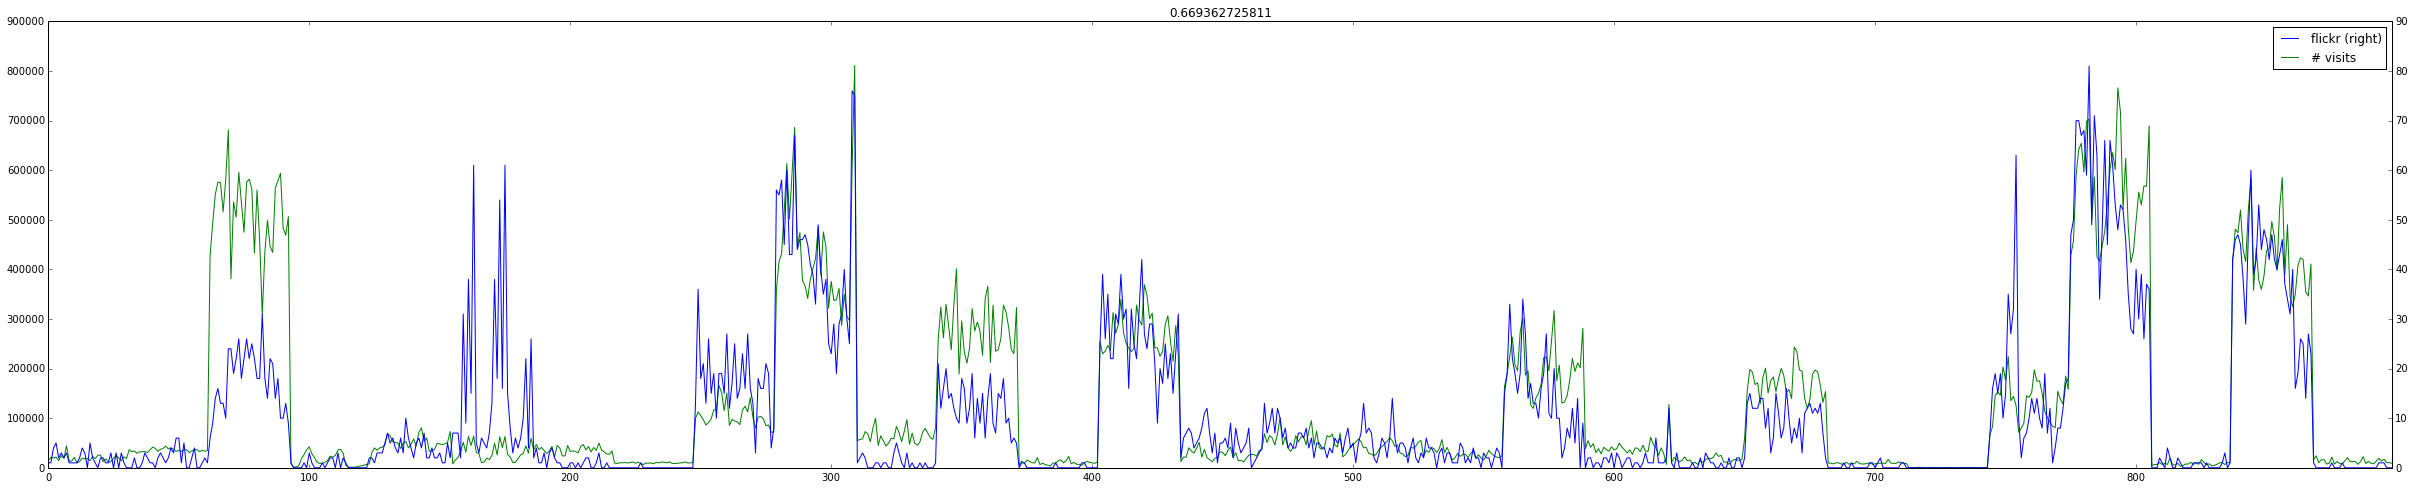

In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(super_x, super_y)
print  r_value**2,slope, intercept, p_value, std_err
df_aaaa = pd.DataFrame(zip(super_x,super_y),columns=['flickr','# visits'])
df_aaaa['museum'] = super_m
# display(df_aaaa)
df_aaaa[['flickr','# visits']].plot(secondary_y='flickr',title=str(r_value**2), figsize=(42,8))

In [29]:
df_aaaa.iloc[300]

flickr               23
# visits         375924
museum      TATE_MODERN
Name: 300, dtype: object

In [30]:
df_aaaa[30:100][df_aaaa['# visits']>60000]

D:\Program Files\Anaconda2\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,flickr,# visits,museum
62,6,427000,NATIONAL_GALLERY
63,9,493000,NATIONAL_GALLERY
64,14,551000,NATIONAL_GALLERY
65,16,576000,NATIONAL_GALLERY
66,13,575000,NATIONAL_GALLERY
67,13,516000,NATIONAL_GALLERY
68,10,581000,NATIONAL_GALLERY
69,24,681000,NATIONAL_GALLERY
70,24,381000,NATIONAL_GALLERY
71,19,536000,NATIONAL_GALLERY
